# Visualizing the Data

In [1]:
# import Useful libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

colors = sns.color_palette()

In [2]:
# load datasets and store into variables
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

Lets see how the mean rating fluxuates across each category of anime in the data


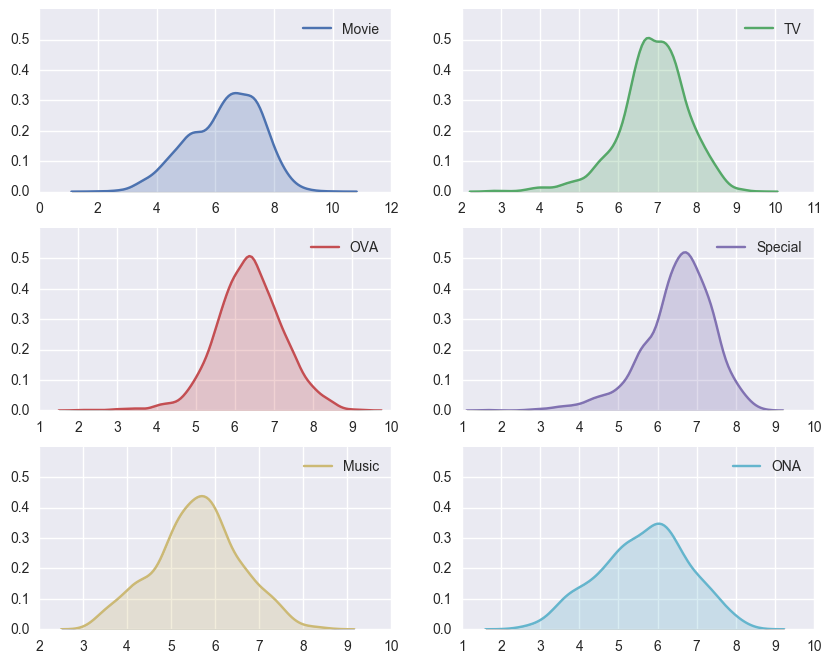

In [3]:
anime = anime.dropna()
plt.figure(figsize=(10,8))

for i, col in enumerate(anime.type.unique()):
    ax = plt.subplot(3, 2, i + 1)
    plt.yticks([.5, .4, .3, .2, .1, 0])
    plt.ylim(ymax=.6)
    sns.kdeplot(anime[anime['type']==col].rating, shade=True, label=col, color = colors[i])   

There is definitely a rating difference across media category. Music and ONA (Original Net Animation) tend to be viewed less favorably than mediums such as TV and Movies which have a larger mean rating.

In [4]:
rating.rating.replace({-1: np.nan}, regex=True, inplace = True)

In [5]:
anime_tv = anime[anime['type']=='TV']
anime_tv.head()

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351


In [6]:
# join the two dataframes on the anime_id columns
merged = rating.merge(anime_tv, left_on = 'anime_id', right_on = 'anime_id', suffixes= ['_user', ''])
merged.rename(columns = {'rating_user':'user_rating'}, inplace = True)

In [7]:
# reogranize the dataframe to the desired columns
merged = merged[['user_id', 'anime_id', 'name', 'genre', 'type', 'episodes', 'user_rating', 'rating']]
merged.head()

,user_id,anime_id,name,genre,type,episodes,user_rating,rating
0,1,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,NaN,7.81
1,3,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,8.0,7.81
2,5,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,6.0,7.81
3,6,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,NaN,7.81
4,10,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,NaN,7.81


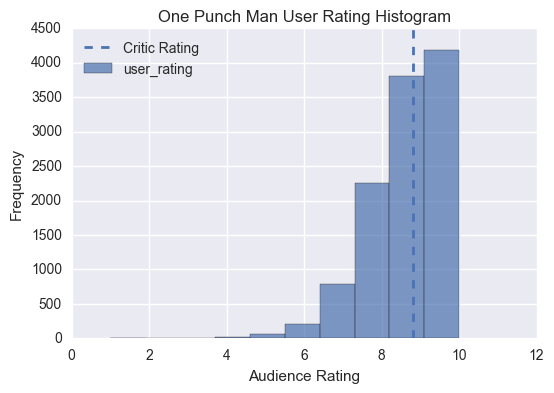

In [8]:
# Lets see how the critc review varies from the users' for a given show

merged[merged['name']=='One Punch Man'].user_rating.plot(kind='hist', color = colors[0], alpha=.7)
plt.axvline(merged[merged['name']=='One Punch Man'].rating.mean(), color=colors[0], linestyle='dashed', linewidth=2, label='Critic Rating')

plt.xlabel('Audience Rating')
plt.title('One Punch Man User Rating Histogram')
plt.legend(loc = 'upper left')

A quick check on how one of my favorite show's user ratings compare with it's critic score

In [9]:
# Shows with the highest count of 10 star ratings
highest_10_count = merged[merged.user_rating == 10].groupby('name').rating.count().sort_values(ascending = False)

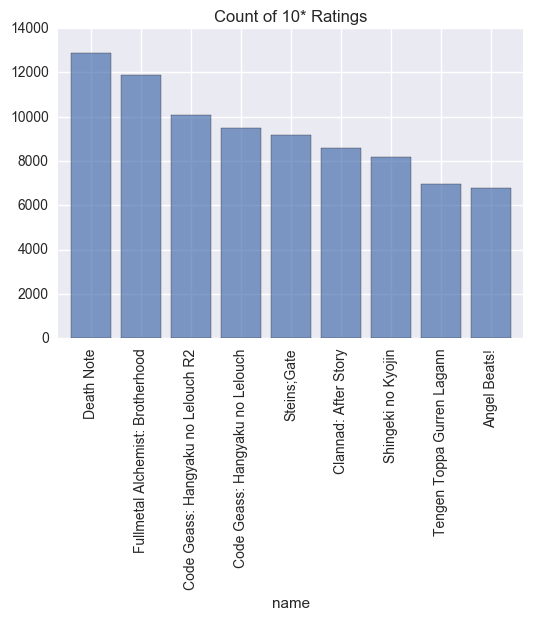

In [10]:
highest_10_count[:10 -1].plot(kind='bar', width = 0.8,color = colors[0], alpha=0.7)
plt.title('Count of 10* Ratings')

In [11]:
# Series of average rating per user
user_rating_mean = merged.groupby('user_id').user_rating.mean().dropna()

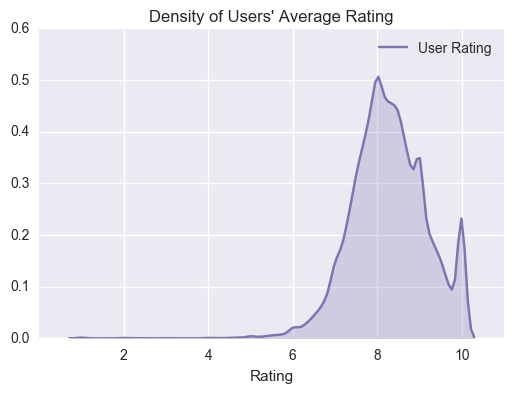

In [12]:
sns.kdeplot(user_rating_mean, shade=True, color = colors[3], label='User Rating') 
plt.xticks([2,4,6,8,10])
plt.xlim(0,11)
plt.title("Density of Users' Average Rating")
plt.xlabel('Rating')

This graph gives us an idea of how users rated. It reflects that users' in this dataset have a tendancy to rate things pretty favorably. With a spike at 10 representing the users who only rated one (or very few) items perfectly.

In [13]:
# series of user standard deviations
user_std = merged.groupby('user_id').user_rating.std().dropna()

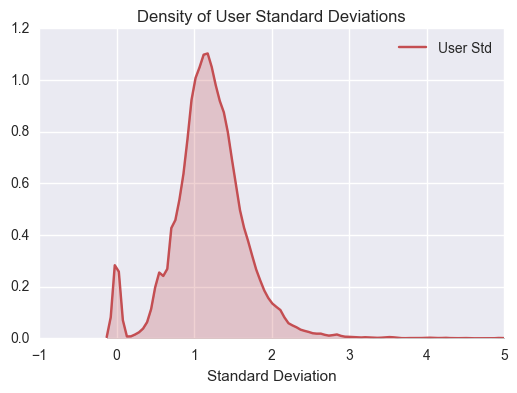

In [14]:
sns.kdeplot(user_std, shade=True, color = colors[2], label='User Std') 
plt.xlim(-1,5)
plt.title('Density of User Standard Deviations')
plt.xlabel('Standard Deviation')

This chart shows us that the majority of users ratings don't vary too greatly (only a couple points). Again a spike on the margin suggesting users who only voted for a single show

In [15]:
# Series of user rating counts
user_rating_count = rating.dropna().groupby('user_id').rating.count()

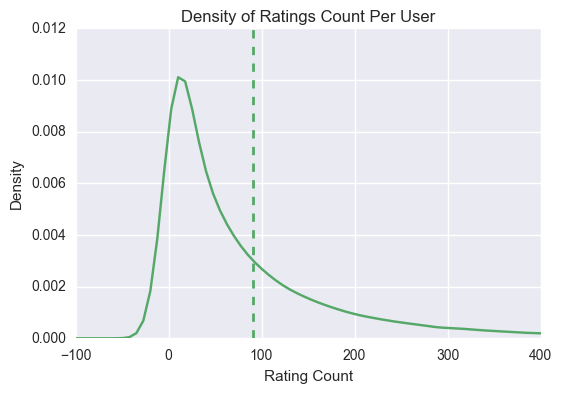

In [16]:
user_rating_count.plot(kind='kde', color=colors[1])
plt.axvline(rating.dropna().groupby('user_id').rating.count().mean(), color=colors[1], linestyle='dashed', linewidth=2)
plt.xlim(-100, 400)
plt.xlabel('Rating Count')
plt.title('Density of Ratings Count Per User')

This graph depicts an intense skew to the right, although the majority of people rate only a few titles, some users have rated hundreds or more.

### Conclusion :
Here you have learnt how to visualize your data in different plots and shading them for more convinience.<br/>
That's it for this one.<br/>
**ALL THE BEST :)**